In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data
data = pd.read_csv("../startup data.csv")

#### Objective

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

#### About the Data

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

* agefirstfunding_year – quantitative
* agelastfunding_year – quantitative
* relationships – quantitative
* funding_rounds – quantitative
* fundingtotalusd – quantitative
* milestones – quantitative
* agefirstmilestone_year – quantitative
* agelastmilestone_year – quantitative
* state – categorical
* industry_type – categorical
* has_VC – categorical
* has_angel – categorical
* has_roundA – categorical
* has_roundB – categorical
* has_roundC – categorical
* has_roundD – categorical
* avg_participants – quantitative
* is_top500 – categorical

* **status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)** 

In [3]:
data.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [4]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [5]:
data.duplicated().any()

False

In [6]:
data.shape

(923, 49)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
data.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.0,5.722979e+02,3.335854e+02,1.000000,2.835000e+02,5.770000e+02,8.665000e+02,1.153000e+03
latitude,923.0,3.851744e+01,3.741497e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,923.0,-1.035392e+02,2.239417e+01,-122.756956,-1.221987e+02,-1.183740e+02,-7.721473e+01,1.805712e+01
labels,923.0,6.468039e-01,4.782221e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,923.0,2.235630e+00,2.510449e+00,-9.046600,5.767000e-01,1.446600e+00,3.575350e+00,2.189590e+01
age_last_funding_year,923.0,3.931456e+00,2.967910e+00,-9.046600,1.669850e+00,3.528800e+00,5.560250e+00,2.189590e+01
age_first_milestone_year,771.0,3.055353e+00,2.977057e+00,-14.169900,1.000000e+00,2.520500e+00,4.686300e+00,2.468490e+01
age_last_milestone_year,771.0,4.754423e+00,3.212107e+00,-7.005500,2.411000e+00,4.476700e+00,6.753400e+00,2.468490e+01
relationships,923.0,7.710726e+00,7.265776e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,923.0,2.310943e+00,1.390922e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01


In [10]:
# id and name have the same number of uique values and no null values.
# Data might be duplicated
data.describe(include=[np.object]).T

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


In [11]:
startup = data.drop(["Unnamed: 0", "Unnamed: 6"], axis=1)
startup.shape

(923, 47)

In [12]:
# Both entries are almost identical. The only difference is the longitude and latitude
(startup[startup["id"] == "c:28482"]).T

,124,832
state_code,CA,CA
latitude,37.5483,37.4815
longitude,-121.989,-121.945
zip_code,94538,94538
id,c:28482,c:28482
city,Fremont,Fremont
name,Redwood Systems,Redwood Systems
labels,1,1
founded_at,1/1/2008,1/1/2008
closed_at,NaN,NaN


In [13]:
startup.drop(832, inplace=True)
startup.shape

(922, 47)

In [14]:
(startup["state_code"] == startup["state_code.1"]).sum()

921

In [15]:
startup["state_code.1"].isna().sum()

1

In [16]:
(startup["id"] == startup["object_id"]).sum()

922

In [17]:
to_drop = ["state_code.1", "object_id", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate",
          "is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising",
          "is_gamesvideo", "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory"]

In [18]:
startup.drop(to_drop, inplace=True, axis=1)

In [19]:
startup.shape

(922, 30)

In [20]:
col_list = startup.columns.to_list()

In [21]:
for column in col_list:
    if startup[column].nunique() < 60 and startup[column].nunique() > 2:
        print(f"{column}:", startup[column].nunique())

state_code: 35
relationships: 41
funding_rounds: 9
milestones: 8
category_code: 35
avg_participants: 59


In [22]:
for column in col_list:
    if startup[column].nunique() == 2:
        print(f"{column}:", startup[column].nunique())

labels: 2
has_VC: 2
has_angel: 2
has_roundA: 2
has_roundB: 2
has_roundC: 2
has_roundD: 2
is_top500: 2
status: 2


### Cleaning up zip code

In [23]:
startup["zip_code"].sample(10)

287    94041
599     1803
304    94306
159    22201
556     1719
23     94103
755    92677
597    10003
634    98102
605    94089
Name: zip_code, dtype: object

In [24]:
startup["zip_code"].isna().sum()

0

In [25]:
regex = r"^(\d{5})"

In [26]:
extr = startup["zip_code"].str.extract(regex, expand=False)
extr.sample(10)

265    94306
443    94041
629    10010
207    95037
740    94108
716    20165
786    95032
431    90211
49     94404
346    94108
Name: zip_code, dtype: object

In [27]:
extr.isna().sum()

101

In [28]:
common = extr.mode()[0]
extr = extr.fillna(common)
extr.isna().sum()

0

In [29]:
startup["zip_code"] = extr

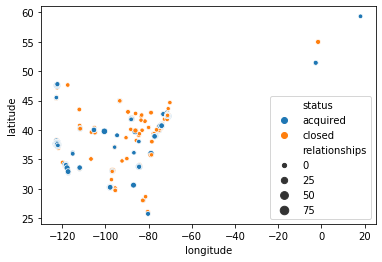

In [30]:
# Visualising the location of acquired and closed startups
sns.scatterplot(
    data=startup, 
    x="longitude", 
    y="latitude", 
    size="relationships", 
    hue="status")

## Univariate analysis

### Continuous data

In [31]:
sns.set(rc={"figure.figsize":(15, 8)})

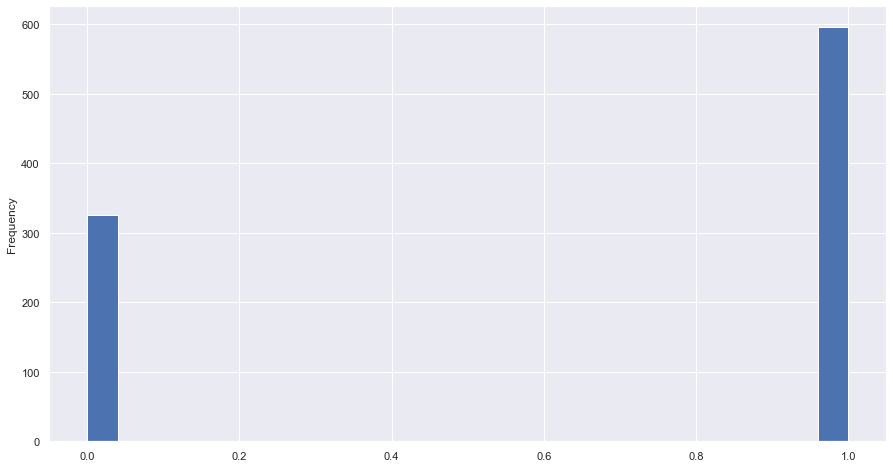

In [32]:
startup["labels"].plot(kind="hist", bins=25);

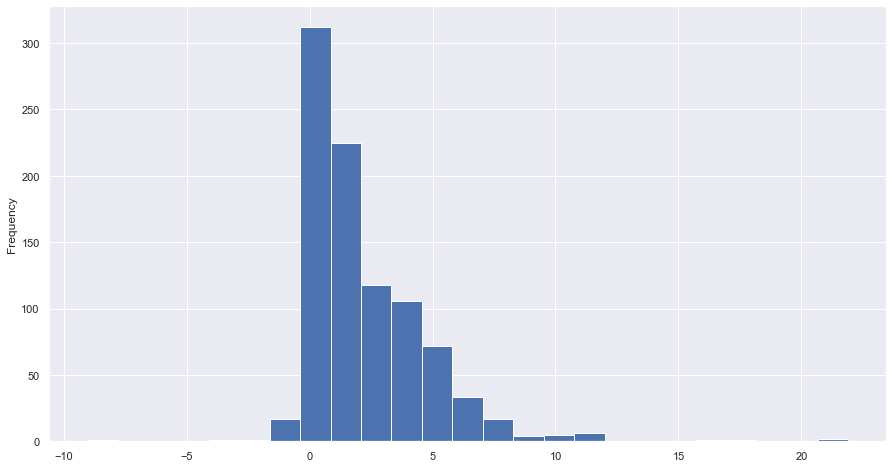

In [33]:
startup["age_first_funding_year"].plot.hist(bins=25);

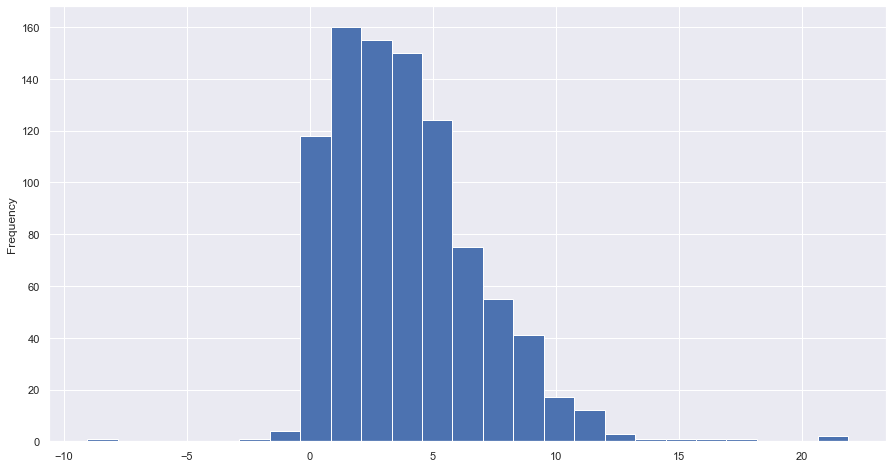

In [34]:
startup["age_last_funding_year"].plot.hist(bins=25);

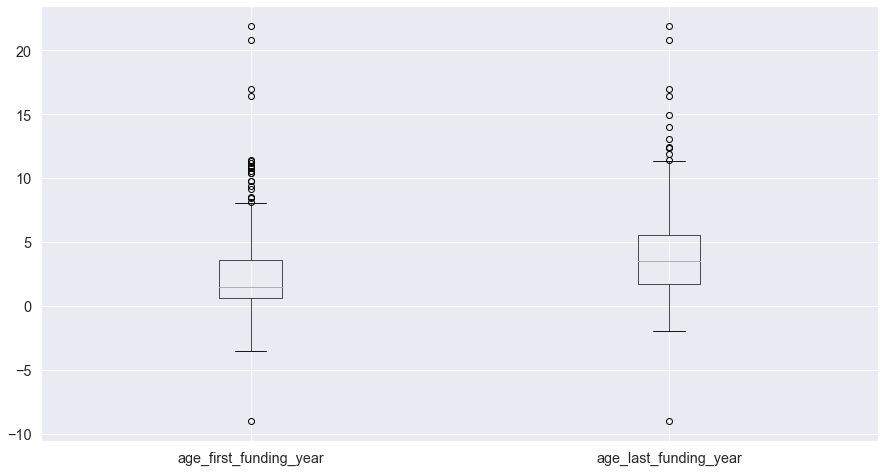

In [35]:
startup.boxplot(column=["age_first_funding_year", "age_last_funding_year"], fontsize="large");

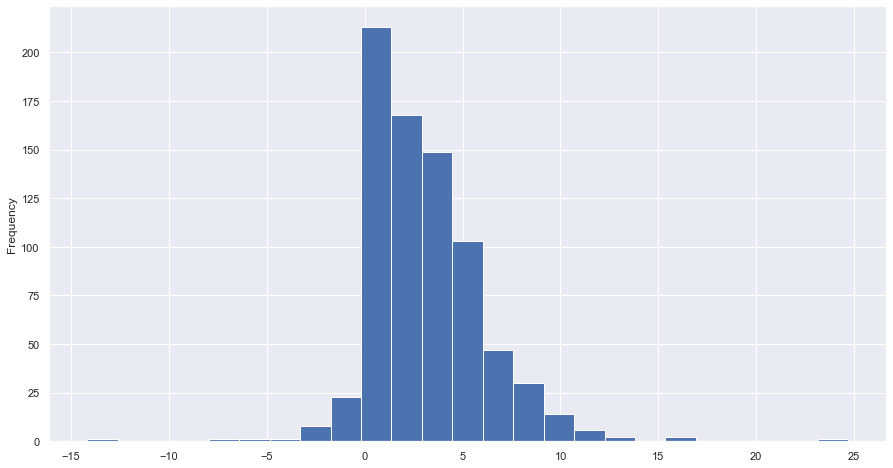

In [36]:
startup.age_first_milestone_year.plot.hist(bins=25);

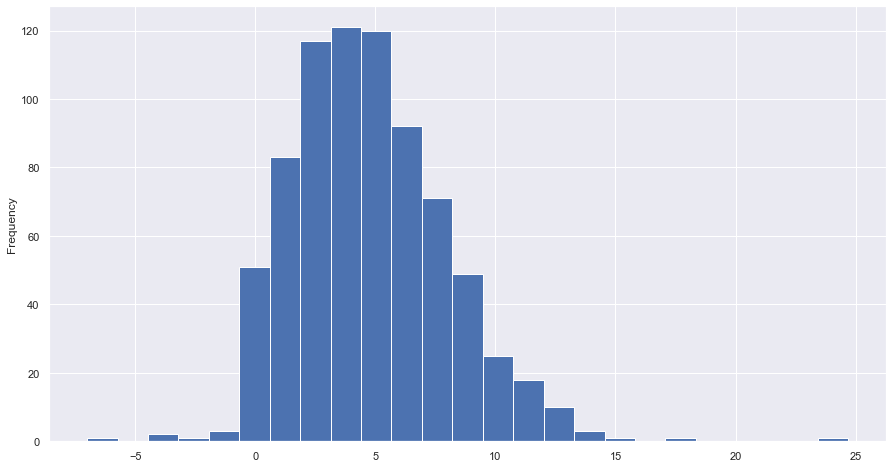

In [37]:
startup.age_last_milestone_year.plot.hist(bins=25);

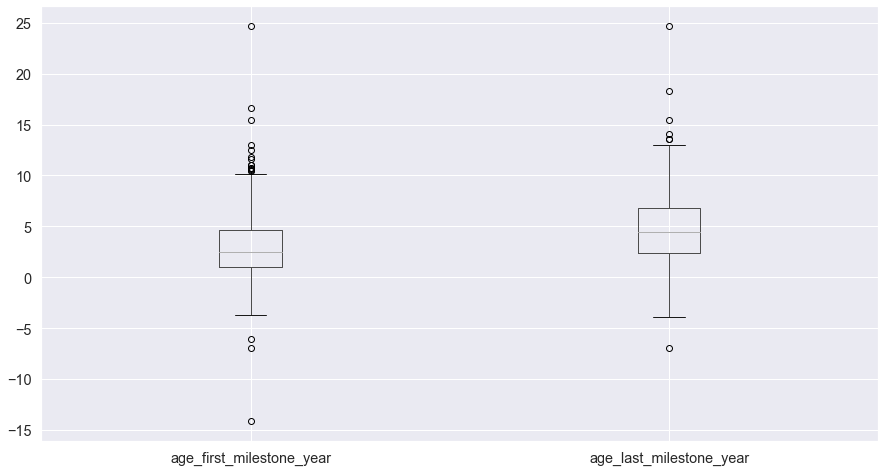

In [38]:
startup.boxplot(column=["age_first_milestone_year", "age_last_milestone_year"], fontsize="large");

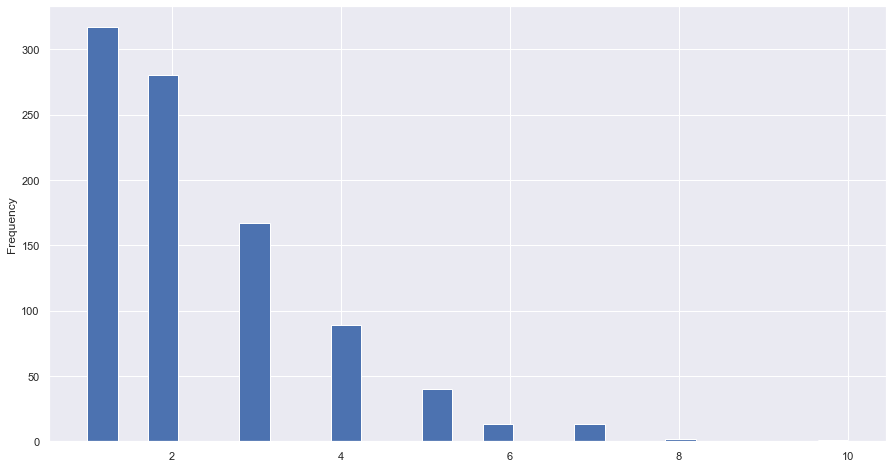

In [39]:
startup.funding_rounds.plot.hist(bins=25,);

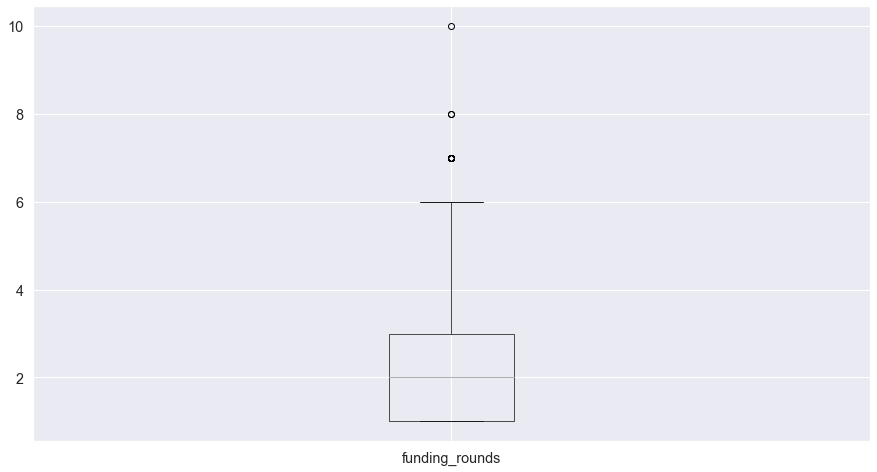

In [40]:
startup.boxplot(column="funding_rounds", fontsize="large");

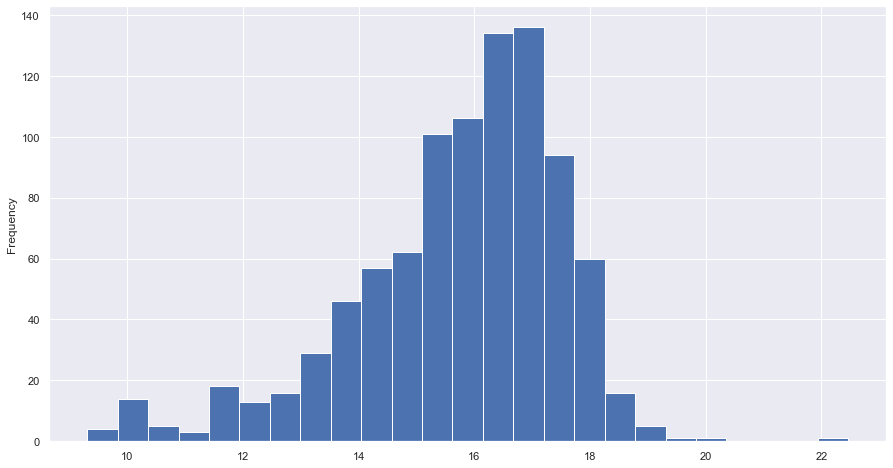

In [41]:
np.log(startup.funding_total_usd).plot.hist(bins=25);

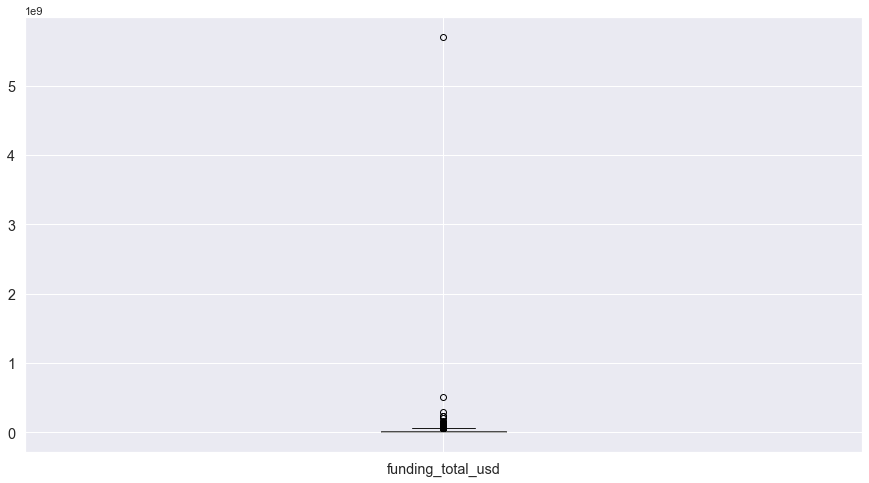

In [42]:
startup.boxplot(column="funding_total_usd", fontsize="large");

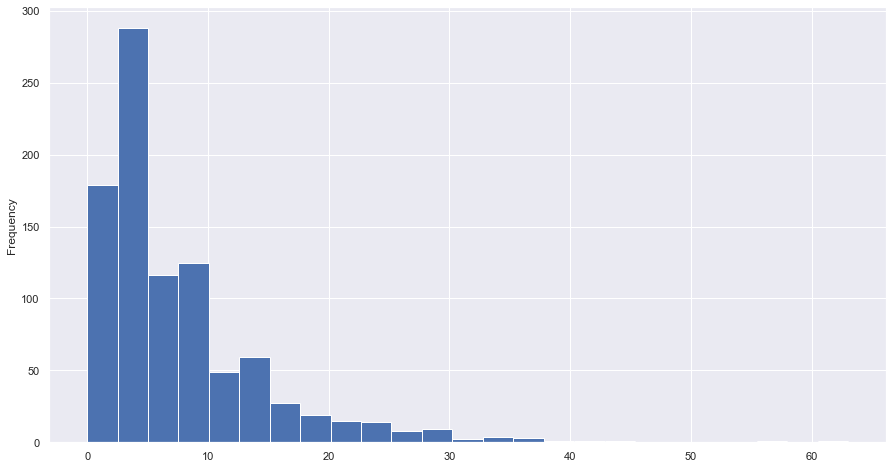

In [43]:
startup.relationships.plot.hist(bins=25);

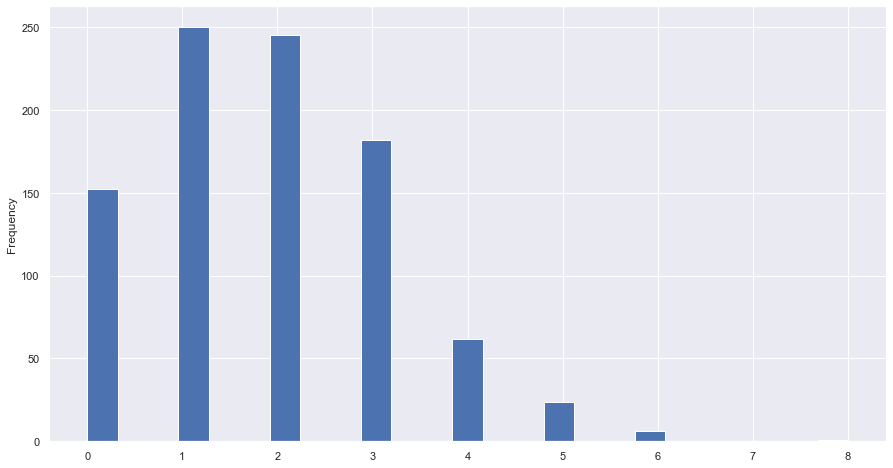

In [44]:
startup.milestones.plot.hist(bins=25);

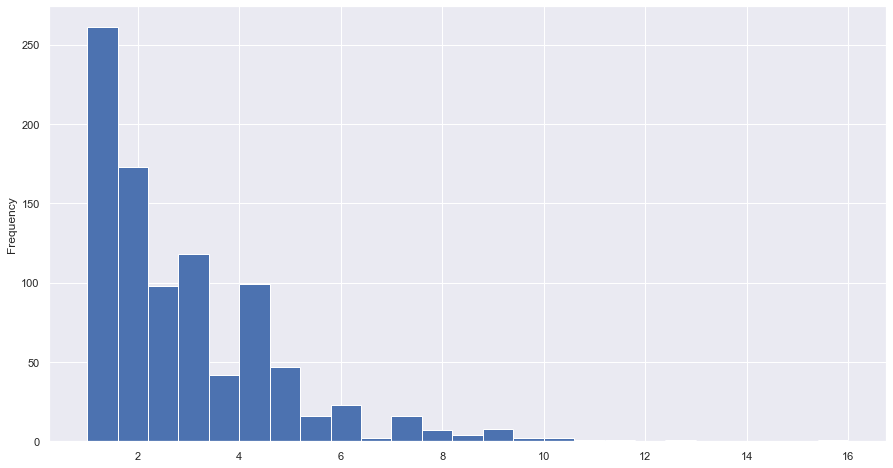

In [45]:
startup.avg_participants.plot.hist(bins=25);

### Categorical data

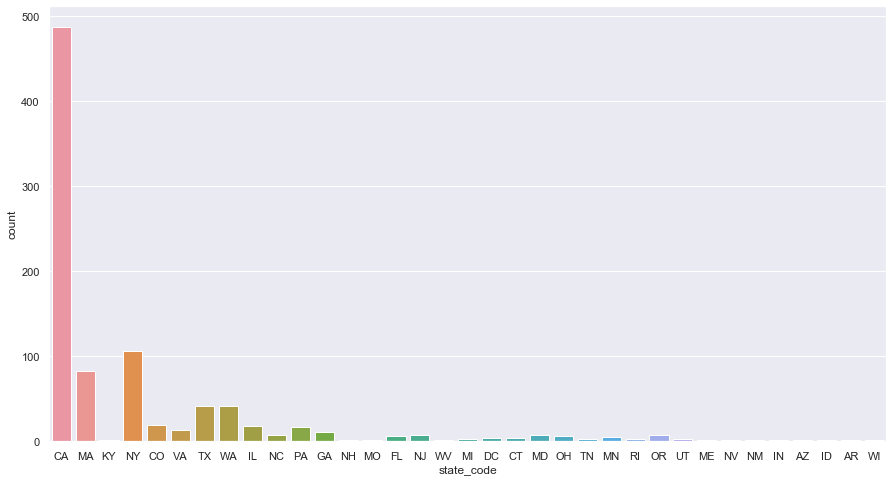

In [46]:
sns.countplot(x="state_code", data=startup)

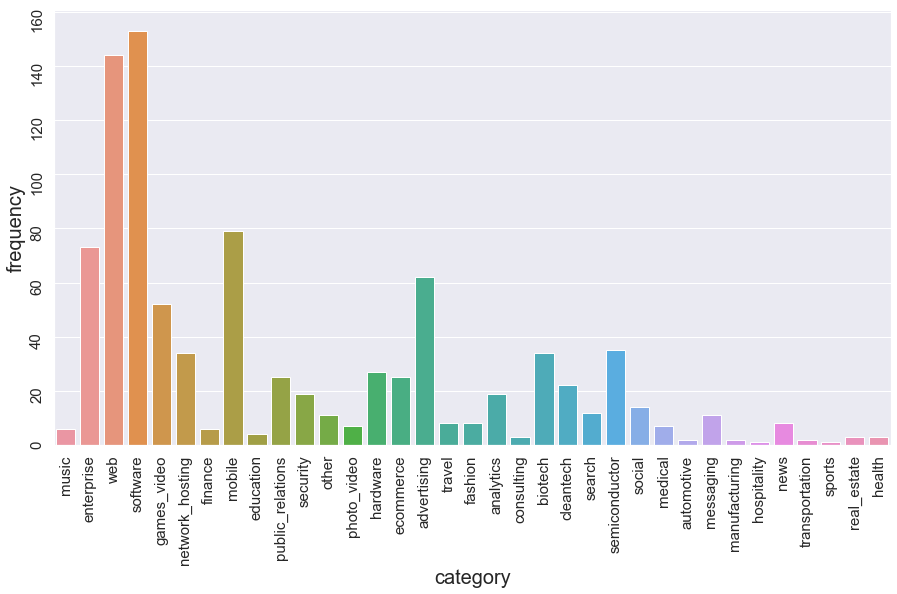

In [47]:
sns.countplot(data=startup, x="category_code")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

In [87]:
startup.city.nunique()

221

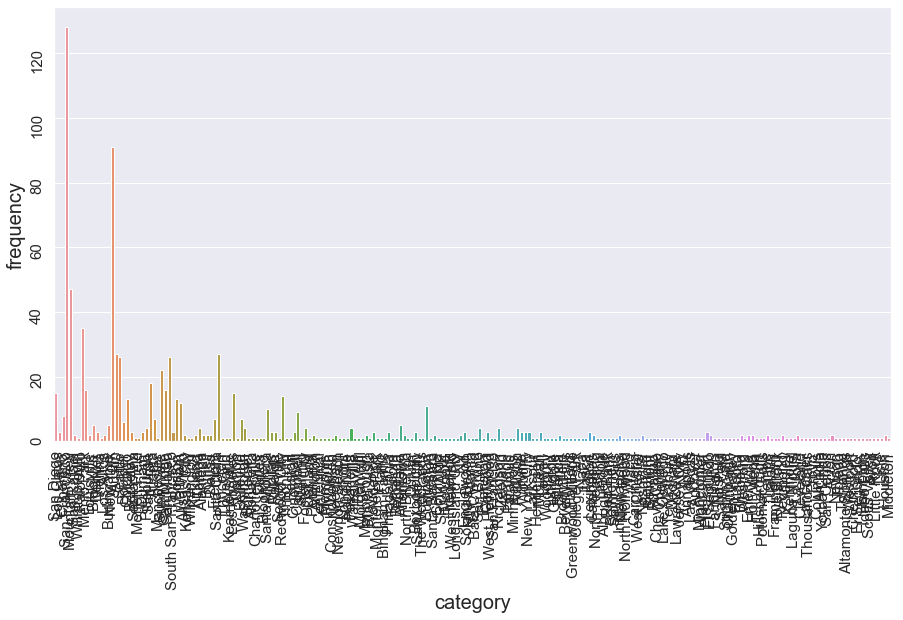

In [49]:
# There are 221 unique cities... It's a little hard to visualise
sns.countplot(data=startup, x="city")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

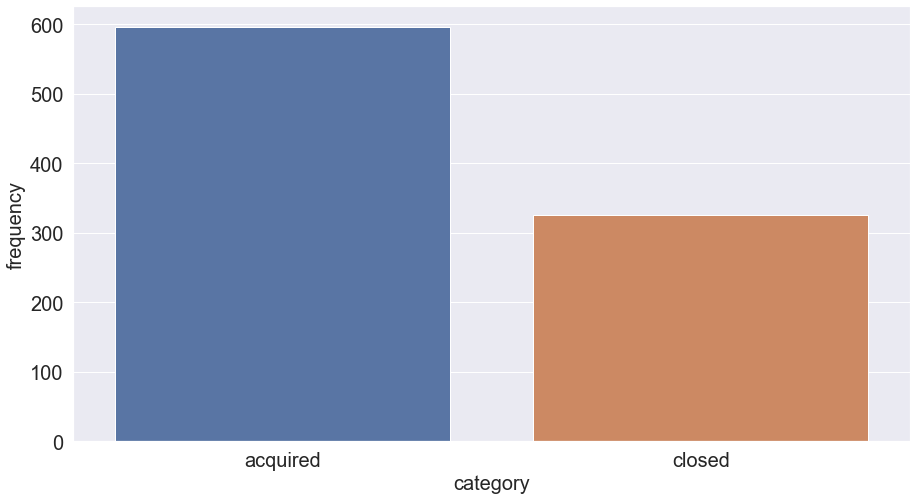

In [50]:
sns.countplot(data=startup, x="status")

plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=20);

### Cleaning the milestone year columns

In [52]:
startup[["age_first_milestone_year", "age_last_milestone_year"]].isna().sum()

age_first_milestone_year    152
age_last_milestone_year     152
dtype: int64

In [63]:
first_mile_avg = startup["age_first_milestone_year"].mean()

In [64]:
last_mile_avg = startup["age_last_milestone_year"].mean()

In [80]:
startup["age_first_milestone_year"] = startup["age_first_milestone_year"].fillna(first_mile_avg)

In [81]:
startup["age_last_milestone_year"] = startup["age_last_milestone_year"].fillna(last_mile_avg)

In [82]:
startup.isna().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   587
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
category_code                 0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
status                        0
dtype: int64

In [83]:
startup["closed_at"].sample(10)

644           NaN
455           NaN
605           NaN
236           NaN
745     7/15/2012
296           NaN
715      8/1/2013
284    11/29/2011
315           NaN
410      8/1/2012
Name: closed_at, dtype: object

## Multivariate analysis

### Continuous vs Continuous variables

In [78]:
startup.corr()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
latitude,1.000000,0.368378,0.046798,-0.047056,-0.041645,-0.072041,-0.054374,-0.038955,-0.000295,-0.072931,0.017745,0.031513,0.028722,-0.032795,-0.011437,-0.057322,-0.018927,-0.018272,0.032826
longitude,0.368378,1.000000,-0.035456,-0.014692,-0.000003,-0.051792,-0.087988,-0.072480,0.023558,0.018018,-0.016320,0.026173,0.101536,-0.065469,-0.065986,-0.040778,-0.043169,-0.045490,-0.091525
labels,0.046798,-0.035456,1.000000,-0.075201,0.073623,0.162398,0.266142,0.359993,0.205301,0.040150,0.328264,-0.057749,-0.072407,0.183669,0.207495,0.164790,0.140257,0.186309,0.310394
age_first_funding_year,-0.047056,-0.014692,-0.075201,1.000000,0.762641,0.593581,0.471972,-0.187374,-0.154854,0.046388,-0.295876,0.169281,-0.346488,-0.292661,-0.059797,0.034617,0.121155,0.114190,0.050964
age_last_funding_year,-0.041645,-0.000003,0.073623,0.762641,1.000000,0.687562,0.632202,0.072958,0.386099,0.116365,-0.122929,0.351189,-0.354438,-0.099990,0.258930,0.317721,0.312421,0.122956,0.200670
age_first_milestone_year,-0.072041,-0.051792,0.162398,0.593581,0.687562,1.000000,0.777488,0.245539,0.195523,0.063905,-0.054505,0.109897,-0.279104,0.015094,0.191145,0.209752,0.253101,0.055671,0.155405
age_last_milestone_year,-0.054374,-0.087988,0.266142,0.471972,0.632202,0.777488,1.000000,0.348893,0.262658,0.093544,0.333208,0.090168,-0.249686,0.113651,0.262384,0.279992,0.252561,0.083392,0.207032
relationships,-0.038955,-0.072480,0.359993,-0.187374,0.072958,0.245539,0.348893,1.000000,0.358175,0.093785,0.513935,-0.030335,-0.060111,0.316501,0.284200,0.258705,0.207897,0.115409,0.221870
funding_rounds,-0.000295,0.023558,0.205301,-0.154854,0.386099,0.195523,0.262658,0.358175,1.000000,0.115832,0.230191,0.333579,0.011387,0.259646,0.443541,0.439669,0.324338,0.043495,0.258946
funding_total_usd,-0.072931,0.018018,0.040150,0.046388,0.116365,0.063905,0.093544,0.093785,0.115832,1.000000,0.012050,0.009999,-0.059631,-0.023783,0.020073,0.045394,0.045166,0.046269,0.048960


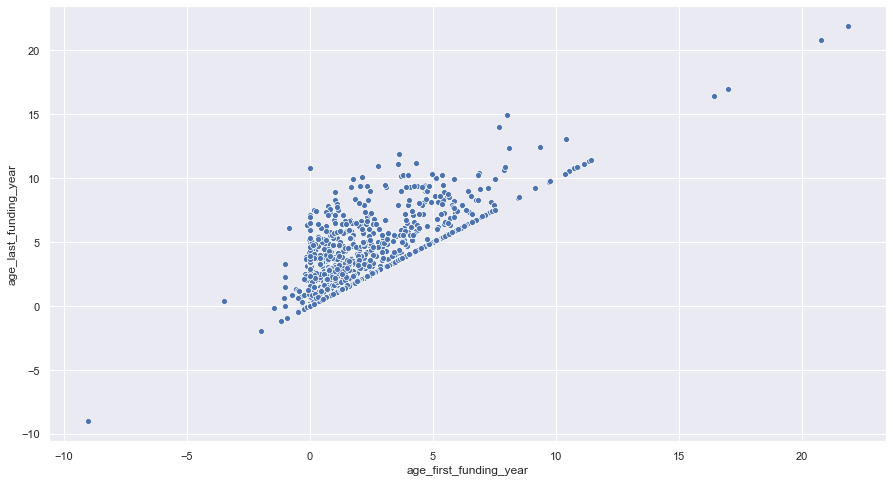

In [68]:
sns.scatterplot(data=startup, x="age_first_funding_year", y="age_last_funding_year")

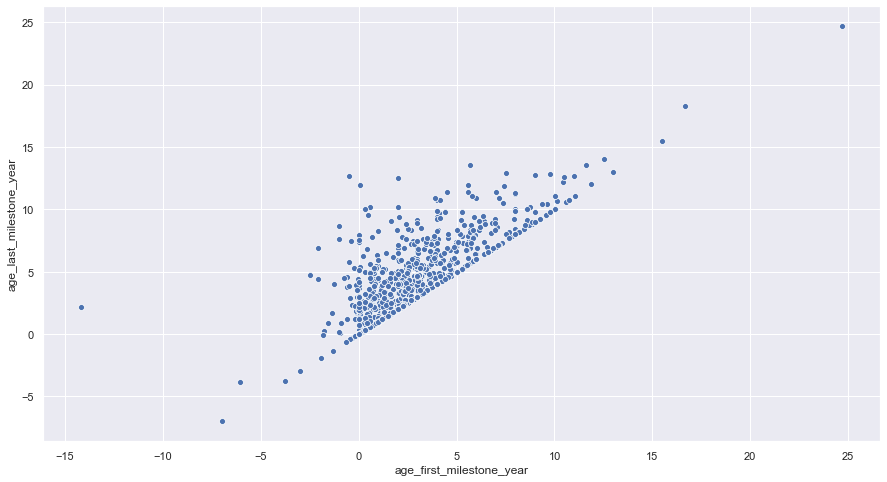

In [84]:
sns.scatterplot(data=startup, x="age_first_milestone_year", y="age_last_milestone_year")

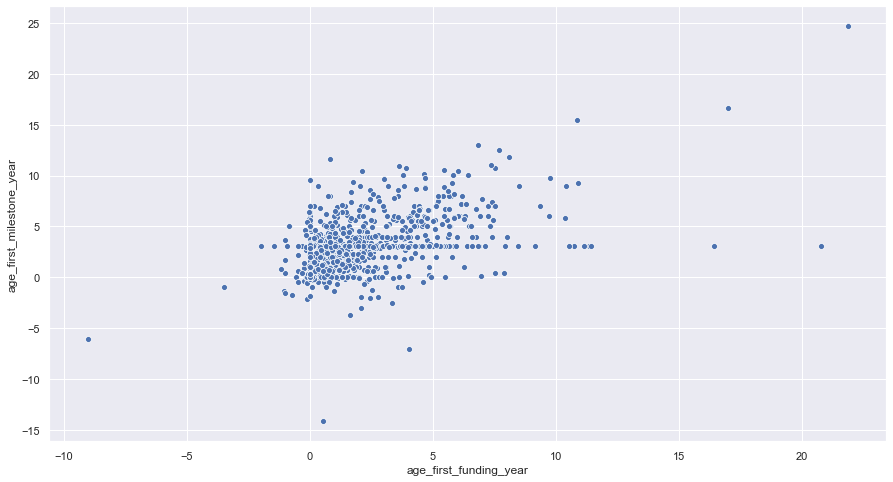

In [85]:
sns.scatterplot(data=startup, x="age_first_funding_year", y="age_first_milestone_year")

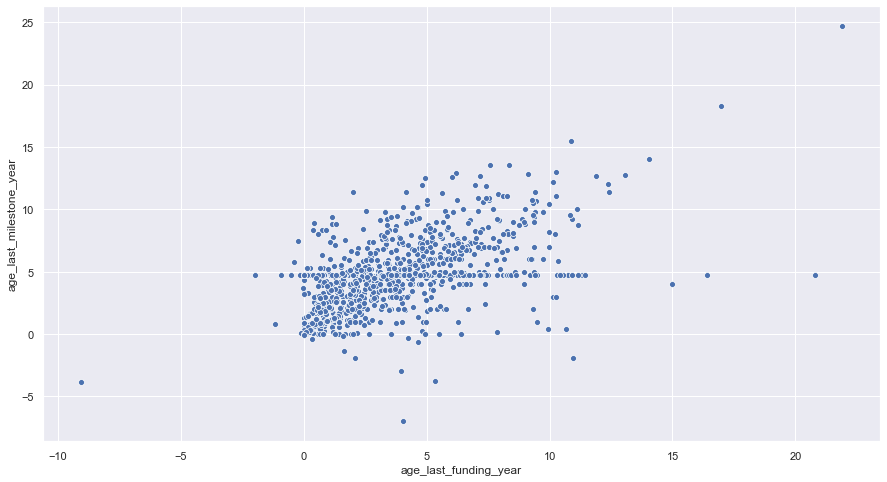

In [86]:
sns.scatterplot(data=startup, x="age_last_funding_year", y="age_last_milestone_year")

In [77]:
(startup["age_first_funding_year"] == startup["age_first_milestone_year"]).sum()

23

### Continuous vs Categorical

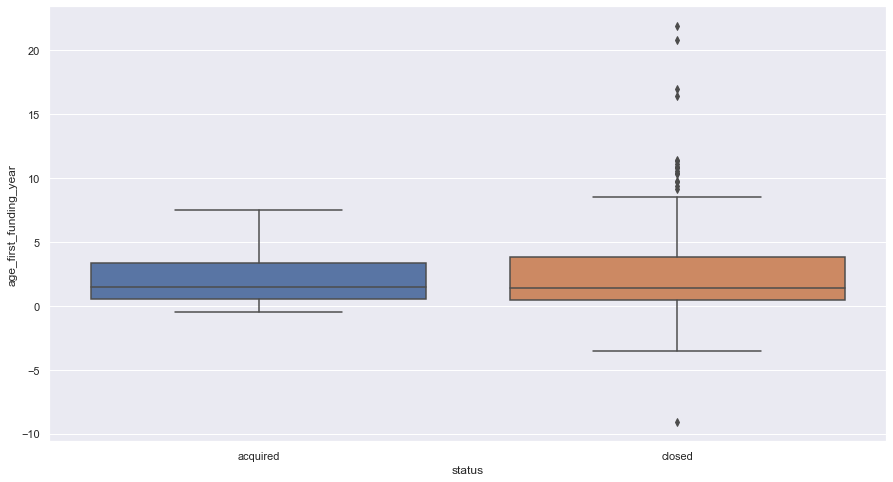

In [74]:
sns.boxplot(data=startup, x="status", y="age_first_funding_year")